In [1]:
#Basic imports for visualizations and Dataset working
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Accuracy metrics
from sklearn.metrics import accuracy_score, classification_report

#Models
from sklearn.ensemble import GradientBoostingClassifier

#Importing dataset splitting library
from sklearn.model_selection import train_test_split

#Encoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

#Imbalance Dataset
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (d:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
df = pd.read_csv('C:\\Users\\Ganesh\\Desktop\\major\\cirrhosis.csv')

In [ ]:
df.sample(5)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
386,387,1653,C,NaN,17897,F,NaN,NaN,NaN,S,13.6,NaN,3.00,NaN,NaN,NaN,NaN,233.0,9.9,3.0
167,168,2713,C,Placebo,17442,F,N,Y,N,N,0.4,257.0,3.80,44.0,842.0,97.65,110.0,NaN,9.2,2.0
357,358,2537,C,NaN,23376,F,NaN,NaN,NaN,N,0.8,NaN,3.49,NaN,NaN,NaN,NaN,314.0,10.3,3.0
262,263,1301,CL,Placebo,12738,F,N,Y,Y,S,1.1,432.0,3.57,45.0,1406.0,190.00,77.0,248.0,11.4,4.0
112,113,980,D,D-penicillamine,18713,F,N,Y,Y,N,6.7,374.0,3.74,103.0,979.0,128.65,100.0,266.0,11.1,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
#drop NaN values
df = df.dropna()

In [ ]:
#Convert age to years
newdf = df.copy()

newdf['Age'] = (newdf['Age'] / 365).astype(int)
newdf.sample(5)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
8,9,2400,D,D-penicillamine,42,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
297,298,1300,C,Placebo,52,F,N,Y,N,N,1.1,340.0,3.37,73.0,289.0,97.00,93.0,243.0,10.2,3.0
42,43,4556,C,D-penicillamine,48,F,N,N,N,N,1.1,361.0,3.64,36.0,5430.2,67.08,89.0,203.0,10.6,2.0
108,109,2504,C,Placebo,44,F,N,N,N,N,0.5,120.0,3.61,53.0,804.0,110.05,52.0,271.0,10.6,3.0
158,159,1536,D,Placebo,45,M,N,N,N,N,2.5,317.0,3.46,217.0,714.0,130.20,140.0,207.0,10.1,3.0


<Axes: xlabel='N_Days', ylabel='Age'>

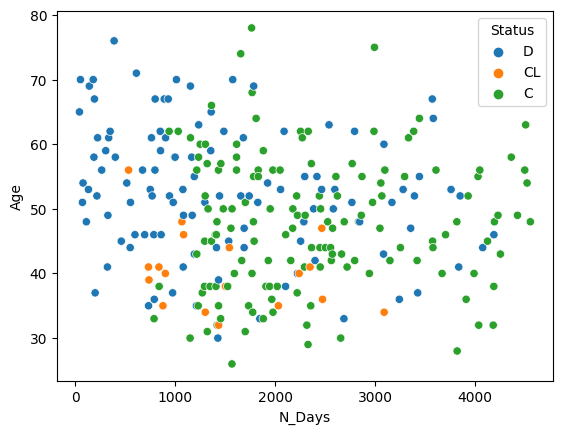

In [ ]:
newdf = newdf.sort_values(by='N_Days')
sns.scatterplot(data=newdf, y='Age', x='N_Days', hue='Status')

<Axes: xlabel='count', ylabel='Stage'>

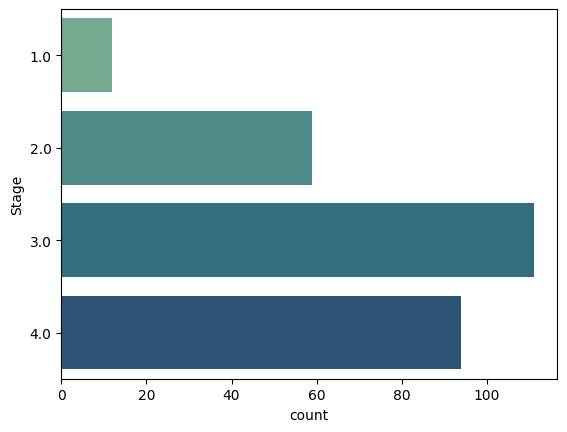

In [ ]:
sns.countplot(data=newdf, y='Stage', palette='crest')

In [ ]:
# Remove ID, N_Days and Status columns
newdf = newdf.drop(['ID', 'N_Days', 'Status'], axis=1)

In [ ]:
#unique values to Drugs
print(newdf['Drug'].value_counts())

Drug
Placebo            140
D-penicillamine    136
Name: count, dtype: int64


In [ ]:
newdf

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
280,D-penicillamine,65,F,Y,N,N,Y,17.9,175.0,2.10,220.0,705.0,338.00,229.0,62.0,12.9,4.0
9,Placebo,70,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0
75,D-penicillamine,51,F,N,Y,Y,S,12.2,394.0,3.08,111.0,2132.0,155.00,243.0,165.0,11.6,4.0
26,Placebo,54,F,Y,Y,Y,S,21.6,175.0,3.31,221.0,3697.4,101.91,168.0,80.0,12.0,4.0
102,Placebo,48,F,Y,Y,Y,Y,2.5,188.0,3.67,57.0,1273.0,119.35,102.0,110.0,11.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,Placebo,49,M,N,N,N,N,1.9,259.0,3.70,281.0,10396.8,188.34,178.0,214.0,11.0,3.0
1,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
28,Placebo,63,F,N,N,N,N,0.7,370.0,3.78,24.0,5833.0,73.53,86.0,390.0,10.6,2.0
31,Placebo,54,F,N,Y,N,N,1.8,262.0,3.34,101.0,7277.0,82.56,158.0,286.0,10.6,4.0


In [ ]:
# Unique values to Stage
stage = newdf['Stage'].unique()
print(list(stage))

[4.0, 3.0, 2.0, 1.0]


<Axes: title={'center': 'How age affects stages'}, xlabel='Stage', ylabel='Age'>

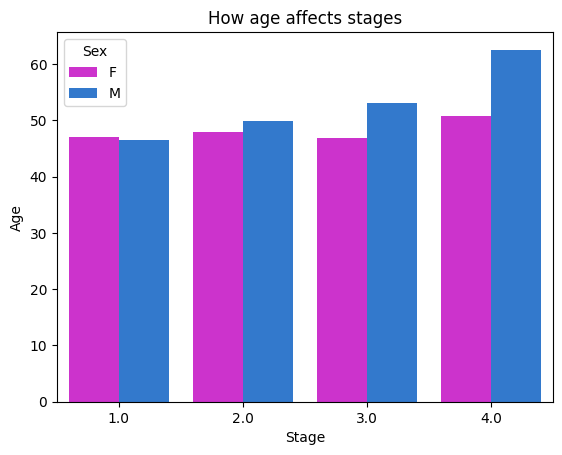

In [ ]:
# Barplot
plt.title('How age affects stages')
sns.barplot(data=newdf, x='Stage', y='Age', hue='Sex', palette=['#E619E5', '#1977E6'], errorbar=None)


In [ ]:
newdf['Stage'].value_counts()

# people doing treatment for more that 500 days and are both placebo 

Stage
3.0    111
4.0     94
2.0     59
1.0     12
Name: count, dtype: int64

In [ ]:
newdf

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
280,D-penicillamine,65,F,Y,N,N,Y,17.9,175.0,2.10,220.0,705.0,338.00,229.0,62.0,12.9,4.0
9,Placebo,70,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0
75,D-penicillamine,51,F,N,Y,Y,S,12.2,394.0,3.08,111.0,2132.0,155.00,243.0,165.0,11.6,4.0
26,Placebo,54,F,Y,Y,Y,S,21.6,175.0,3.31,221.0,3697.4,101.91,168.0,80.0,12.0,4.0
102,Placebo,48,F,Y,Y,Y,Y,2.5,188.0,3.67,57.0,1273.0,119.35,102.0,110.0,11.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,Placebo,49,M,N,N,N,N,1.9,259.0,3.70,281.0,10396.8,188.34,178.0,214.0,11.0,3.0
1,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
28,Placebo,63,F,N,N,N,N,0.7,370.0,3.78,24.0,5833.0,73.53,86.0,390.0,10.6,2.0
31,Placebo,54,F,N,Y,N,N,1.8,262.0,3.34,101.0,7277.0,82.56,158.0,286.0,10.6,4.0


<Axes: xlabel='Stage', ylabel='count'>

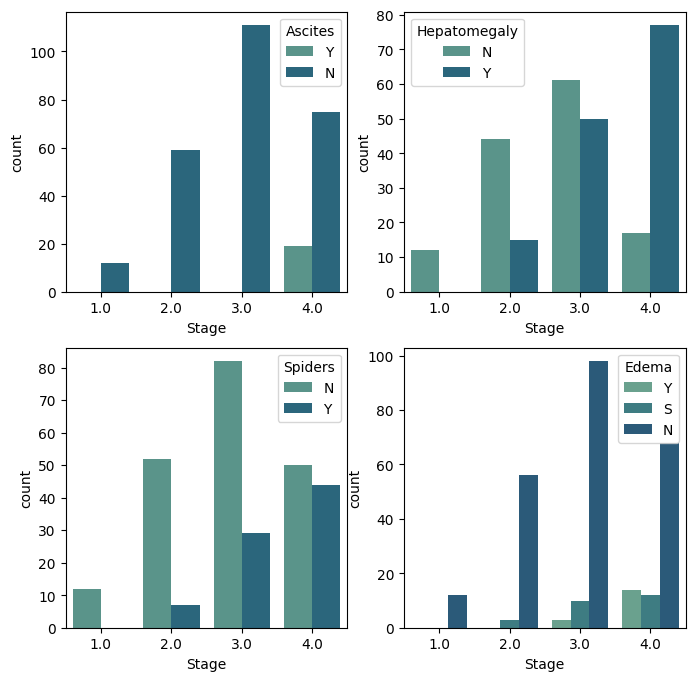

In [ ]:
plt.figure(figsize=(8, 8))

plt.subplot(2,2,1)
sns.countplot(data=newdf, x='Stage', hue='Ascites', palette='crest')

plt.subplot(2,2,2)
sns.countplot(data=newdf, x='Stage', hue='Hepatomegaly', palette='crest')

plt.subplot(2,2,3)
sns.countplot(data=newdf, x='Stage', hue='Spiders', palette='crest')

plt.subplot(2,2,4)
sns.countplot(data=newdf, x='Stage', hue='Edema', palette='crest')

In [ ]:
t_df = newdf['Stage']
t_df

280    4.0
9      4.0
75     4.0
26     4.0
102    4.0
      ... 
47     3.0
1      3.0
28     2.0
31     4.0
42     2.0
Name: Stage, Length: 276, dtype: float64

In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 280 to 42
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           276 non-null    object 
 1   Age            276 non-null    int64  
 2   Sex            276 non-null    object 
 3   Ascites        276 non-null    object 
 4   Hepatomegaly   276 non-null    object 
 5   Spiders        276 non-null    object 
 6   Edema          276 non-null    object 
 7   Bilirubin      276 non-null    float64
 8   Cholesterol    276 non-null    float64
 9   Albumin        276 non-null    float64
 10  Copper         276 non-null    float64
 11  Alk_Phos       276 non-null    float64
 12  SGOT           276 non-null    float64
 13  Tryglicerides  276 non-null    float64
 14  Platelets      276 non-null    float64
 15  Prothrombin    276 non-null    float64
 16  Stage          276 non-null    float64
dtypes: float64(10), int64(1), object(6)
memory usage: 38.8+ KB

In [ ]:
newdf = newdf.iloc[:, :-1]
newdf

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
280,D-penicillamine,65,F,Y,N,N,Y,17.9,175.0,2.10,220.0,705.0,338.00,229.0,62.0,12.9
9,Placebo,70,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5
75,D-penicillamine,51,F,N,Y,Y,S,12.2,394.0,3.08,111.0,2132.0,155.00,243.0,165.0,11.6
26,Placebo,54,F,Y,Y,Y,S,21.6,175.0,3.31,221.0,3697.4,101.91,168.0,80.0,12.0
102,Placebo,48,F,Y,Y,Y,Y,2.5,188.0,3.67,57.0,1273.0,119.35,102.0,110.0,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,Placebo,49,M,N,N,N,N,1.9,259.0,3.70,281.0,10396.8,188.34,178.0,214.0,11.0
1,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
28,Placebo,63,F,N,N,N,N,0.7,370.0,3.78,24.0,5833.0,73.53,86.0,390.0,10.6
31,Placebo,54,F,N,Y,N,N,1.8,262.0,3.34,101.0,7277.0,82.56,158.0,286.0,10.6


In [ ]:
# Label Encode severity
lb = LabelEncoder()
t_df = lb.fit_transform(t_df)

# Feature transformation
categorial_cols = [i for i in newdf.columns if newdf.dtypes[i] in ['O']]
numerical_cols = [i for i in newdf.columns if newdf.dtypes[i] in ['float64', 'int64']]

feature_cols = categorial_cols + numerical_cols

transformer = [
    ('encode', OrdinalEncoder(), categorial_cols),
    ('scale', StandardScaler(), numerical_cols)
]

colTrans = ColumnTransformer(transformer, remainder='passthrough')
n_df_raw = colTrans.fit_transform(newdf)

n_df = pd.DataFrame(
    n_df_raw, columns=colTrans.get_feature_names_out())


In [ ]:
n_df

,encode__Drug,encode__Sex,encode__Ascites,encode__Hepatomegaly,encode__Spiders,encode__Edema,scale__Age,scale__Bilirubin,scale__Cholesterol,scale__Albumin,scale__Copper,scale__Alk_Phos,scale__SGOT,scale__Tryglicerides,scale__Platelets,scale__Prothrombin
0,0.0,0.0,1.0,0.0,0.0,2.0,1.492429,3.171600,-0.837424,-3.506485,1.353236,-0.611662,3.777670,1.596346,-2.149008,2.150544
1,1.0,0.0,1.0,0.0,1.0,2.0,1.968406,2.017602,-0.730752,-1.922541,0.445267,-0.510793,0.408547,0.276567,0.432748,0.759566
2,0.0,0.0,0.0,1.0,1.0,1.0,0.159694,1.930508,0.097025,-1.081071,0.116128,0.064115,0.545432,1.811194,-1.041004,0.858922
3,1.0,0.0,1.0,1.0,1.0,1.0,0.445280,3.977221,-0.837424,-0.511841,1.364586,0.805434,-0.392271,0.660223,-1.955376,1.256344
4,1.0,0.0,1.0,1.0,1.0,2.0,-0.125892,-0.181525,-0.781954,0.379128,-0.496751,-0.342677,-0.084237,-0.352631,-1.632657,0.362144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1.0,1.0,0.0,0.0,0.0,0.0,-0.030697,-0.312166,-0.479005,0.453375,2.045563,3.978036,1.134300,0.813686,-0.513896,0.262788
272,0.0,0.0,0.0,1.0,1.0,0.0,0.635671,-0.486355,-0.295529,1.542337,-0.530800,2.556394,-0.187209,-0.567479,-0.438594,-0.134634
273,1.0,0.0,0.0,0.0,0.0,0.0,1.302039,-0.573449,-0.005380,0.651368,-0.871289,1.816780,-0.893533,-0.598171,1.379392,-0.134634
274,1.0,0.0,0.0,1.0,0.0,0.0,0.445280,-0.333940,-0.466204,-0.437593,0.002632,2.500608,-0.734040,0.506761,0.260631,-0.134634


In [ ]:
# Renaming columns
org_cols = n_df.columns.tolist()
org_cols

new_cols = [i.replace('encode__', '').replace('scale__', '') for i in org_cols]
new_cols

mapper = dict(zip(org_cols, new_cols))
ndf = n_df.rename(mapper, axis='columns')
ndf


# target feature
ndf['Stage'] = t_df

In [ ]:
ndf

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0.0,0.0,1.0,0.0,0.0,2.0,1.492429,3.171600,-0.837424,-3.506485,1.353236,-0.611662,3.777670,1.596346,-2.149008,2.150544,3
1,1.0,0.0,1.0,0.0,1.0,2.0,1.968406,2.017602,-0.730752,-1.922541,0.445267,-0.510793,0.408547,0.276567,0.432748,0.759566,3
2,0.0,0.0,0.0,1.0,1.0,1.0,0.159694,1.930508,0.097025,-1.081071,0.116128,0.064115,0.545432,1.811194,-1.041004,0.858922,3
3,1.0,0.0,1.0,1.0,1.0,1.0,0.445280,3.977221,-0.837424,-0.511841,1.364586,0.805434,-0.392271,0.660223,-1.955376,1.256344,3
4,1.0,0.0,1.0,1.0,1.0,2.0,-0.125892,-0.181525,-0.781954,0.379128,-0.496751,-0.342677,-0.084237,-0.352631,-1.632657,0.362144,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1.0,1.0,0.0,0.0,0.0,0.0,-0.030697,-0.312166,-0.479005,0.453375,2.045563,3.978036,1.134300,0.813686,-0.513896,0.262788,2
272,0.0,0.0,0.0,1.0,1.0,0.0,0.635671,-0.486355,-0.295529,1.542337,-0.530800,2.556394,-0.187209,-0.567479,-0.438594,-0.134634,2
273,1.0,0.0,0.0,0.0,0.0,0.0,1.302039,-0.573449,-0.005380,0.651368,-0.871289,1.816780,-0.893533,-0.598171,1.379392,-0.134634,1
274,1.0,0.0,0.0,1.0,0.0,0.0,0.445280,-0.333940,-0.466204,-0.437593,0.002632,2.500608,-0.734040,0.506761,0.260631,-0.134634,3


<Axes: >

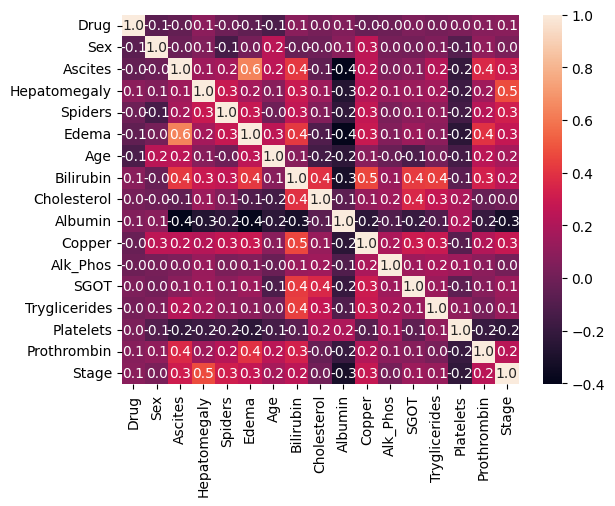

In [ ]:
# heatmap
sns.heatmap(ndf.corr(), annot=True, fmt='.01f')

In [ ]:
ndf.corr()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
Drug,1.000000,-0.071586,-0.046877,0.086582,-0.009260,-0.052741,-0.128420,0.080922,0.021723,0.053743,-0.028832,-0.009397,0.040706,0.017799,0.039366,0.070773,0.080087
Sex,-0.071586,1.000000,-0.014830,0.055305,-0.142273,0.014950,0.239317,-0.027474,-0.008414,0.079899,0.251731,0.019439,0.008538,0.051218,-0.095021,0.103977,0.034206
Ascites,-0.046877,-0.014830,1.000000,0.149598,0.173254,0.634763,0.247766,0.414603,-0.057578,-0.403384,0.247268,0.042037,0.080520,0.225414,-0.211158,0.361506,0.306251
Hepatomegaly,0.086582,0.055305,0.149598,1.000000,0.285068,0.169855,0.077438,0.288092,0.140896,-0.271408,0.224367,0.132990,0.136204,0.162103,-0.179722,0.153115,0.479132
Spiders,-0.009260,-0.142273,0.173254,0.285068,1.000000,0.279650,-0.005928,0.261701,0.061817,-0.225611,0.267521,0.035218,0.091350,0.102546,-0.157704,0.228985,0.316755
Edema,-0.052741,0.014950,0.634763,0.169855,0.279650,1.000000,0.250510,0.414284,-0.109524,-0.391656,0.282815,0.060116,0.140642,0.087190,-0.241685,0.396914,0.272877
Age,-0.128420,0.239317,0.247766,0.077438,-0.005928,0.250510,1.000000,0.076661,-0.156105,-0.236195,0.080690,-0.020896,-0.121896,0.022924,-0.148434,0.243117,0.176189
Bilirubin,0.080922,-0.027474,0.414603,0.288092,0.261701,0.414284,0.076661,1.000000,0.394966,-0.312043,0.460527,0.138787,0.424987,0.439691,-0.074395,0.331176,0.247861
Cholesterol,0.021723,-0.008414,-0.057578,0.140896,0.061817,-0.109524,-0.156105,0.394966,1.000000,-0.067299,0.124413,0.152281,0.356971,0.273896,0.192548,-0.033374,0.004573
Albumin,0.053743,0.079899,-0.403384,-0.271408,-0.225611,-0.391656,-0.236195,-0.312043,-0.067299,1.000000,-0.240408,-0.111497,-0.198210,-0.109673,0.198600,-0.199584,-0.310473


In [ ]:
x = ndf.iloc[:, :-1]
y = ndf.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)

# correcting imbalance dataset
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [ ]:
gr = GradientBoostingClassifier()
gr.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
print(accuracy_score(y_test, gr.predict(x_test)))

0.5217391304347826
